In [57]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [58]:
df = pd.read_csv("results/timings.csv")
df["Image size"] = df["size"].astype(str) + "x" + df["size"].astype(str)

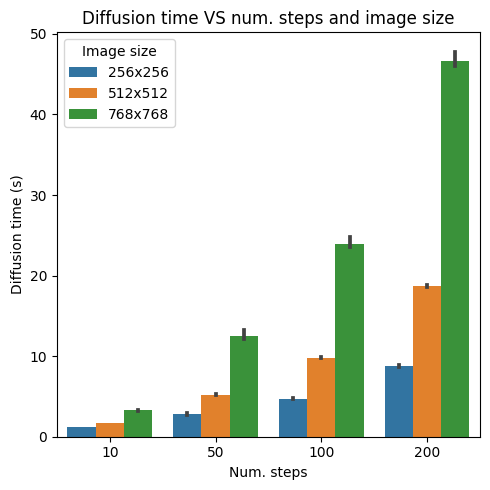

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(data=df, x="steps", y="total_time", hue="Image size", ax=ax)
ax.set_title("Diffusion time VS num. steps and image size")
ax.set_xlabel("Num. steps")
ax.set_ylabel("Diffusion time (s)")
fig.tight_layout()
fig.savefig("results/diffusion_time_vs_steps_and_size.png", dpi=300)

In [30]:
# # run nvidia-smi to get GPU memory usage
# import subprocess
# import pandas as pd

# def get_gpu_memory_usage():
#     result = subprocess.check_output(
#         [
#             'nvidia-smi', '--query-gpu=memory.used',
#             '--format=csv,nounits,noheader'
#         ], encoding='utf-8')
#     # Convert lines into a dictionary
#     gpu_memory = [int(x) for x in result.strip().split('\n')]
#     return gpu_memory

# def get_gpu_memory_usage_df():
#     gpu_memory = get_gpu_memory_usage()
#     df = pd.DataFrame(gpu_memory, columns=["memory"])
#     return df

# df = get_gpu_memory_usage_df()
# df.to_csv("results/gpu_memory_usage.csv", index=False)

In [60]:
# collect existing results
import pandas as pd
import os

dfs = []
for file in os.listdir("./results/"):
    if file.endswith(".csv"):
        df = pd.read_csv(f"./results/{file}")
        dfs.append(df)

df = pd.concat(dfs)
df["Image size"] = df["size"].astype(str) + "x" + df["size"].astype(str)

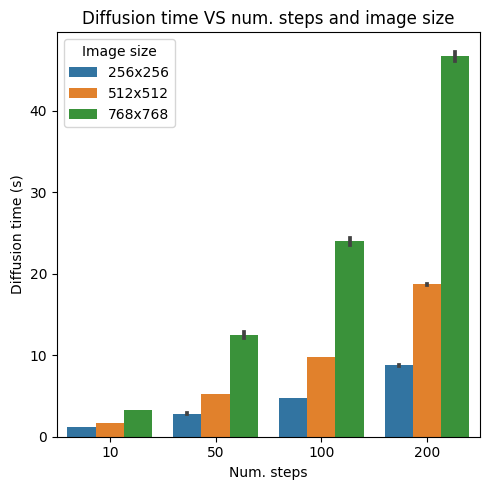

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(data=df, x="steps", y="total_time", hue="Image size", ax=ax)
ax.set_title("Diffusion time VS num. steps and image size")
ax.set_xlabel("Num. steps")
ax.set_ylabel("Diffusion time (s)")
fig.tight_layout()
fig.savefig("results/diffusion_time_vs_steps_and_size.png", dpi=300)

<Axes: xlabel='steps', ylabel='peak_gpu_ram'>

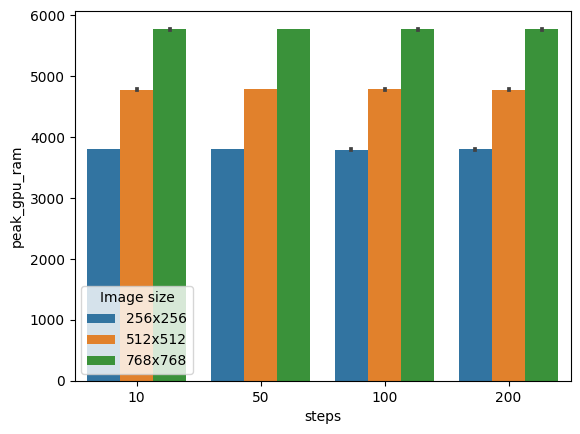

In [62]:
sns.barplot(data=df, x="steps", y="peak_gpu_ram", hue="Image size")

In [48]:
df

,name,cpu_time_total,cuda_time_total,self_cpu_time_total,self_cuda_time_total,cpu_memory_usage,cuda_memory_usage,self_cpu_memory_usage,self_cuda_memory_usage,cpu_time,cuda_time,count,total_time,size,steps,peak_gpu_ram,Image size
0,model_inference,4929896,4204468,1013470,0,0,8521216,-1218192,-66981307904,4929896.0,4204468.0,1,4.929784,256,100,3146,256x256
0,model_inference,1163262,457233,130235,0,0,8520704,-1217580,-7962253824,1163262.0,457233.0,1,1.163148,256,10,3124,256x256
0,model_inference,1119885,440861,127124,0,0,8520704,-1217404,-7981256192,1119885.0,440861.0,1,1.119785,256,10,3124,256x256
0,model_inference,5221397,4984844,566943,0,0,8520704,-4756964,-125921485824,5221397.0,4984844.0,1,5.221288,512,50,3144,512x512
0,model_inference,2725288,2026054,507128,0,0,8520704,-1217584,-34084891136,2725288.0,2026054.0,1,2.725186,256,50,3148,256x256
0,model_inference,24507343,26586163,1162213,0,0,8521216,-10659384,-551605151232,24507343.0,26586163.0,1,24.507222,768,100,3144,768x768
0,model_inference,3234516,2812150,259740,0,0,8520704,-10654592,-64858984448,3234516.0,2812150.0,1,3.234400,768,10,3140,768x768
0,model_inference,8643220,8026099,1982074,0,0,8522752,-1218200,-139715045888,8643220.0,8026099.0,1,8.643119,256,200,3132,256x256
0,model_inference,24292835,26342923,1157143,0,0,8521216,-10654768,-556786651648,24292835.0,26342923.0,1,24.292714,768,100,3124,768x768
0,model_inference,3348205,2907662,283350,0,0,8520704,-10654156,-64730951680,3348205.0,2907662.0,1,3.348085,768,10,3140,768x768
